Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [3]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [4]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN
1015,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0
1016,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0
1017,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0


In [5]:
df = df.loc[:,('LRHandy','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)
df['LRHandy'].replace(1.0, "Righty",inplace=True)
df['LRHandy'].replace(2.0, "Lefty",inplace=True)

#df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1 =pd.crosstab(df['LRHandy'], df['throwDirection'],margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
LRHandy,,,,,,,,,,
Lefty,18,4,28,6,1,8,41,16,52,174
Righty,77,30,122,26,7,44,184,86,213,789
Total,95,34,150,32,8,52,225,102,265,963


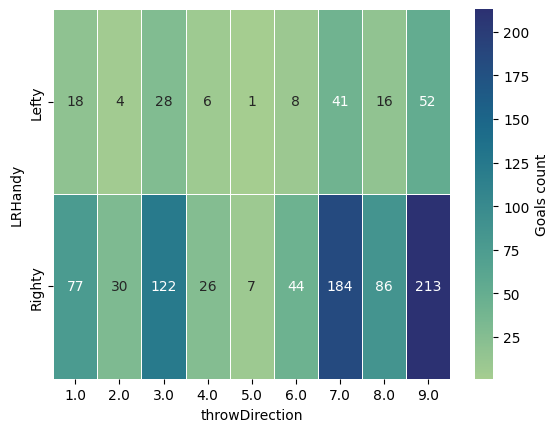

In [6]:
figab, axab = plt.subplots() 
sns.heatmap(pd.crosstab(df['LRHandy'], df['throwDirection'],margins=False, margins_name="Total") , linewidth=0.5, ax=axab, annot=True, cmap="crest",fmt='.3g',cbar_kws={'label': 'Goals count'})
#ax.xaxis.tick_top()
plt.show()

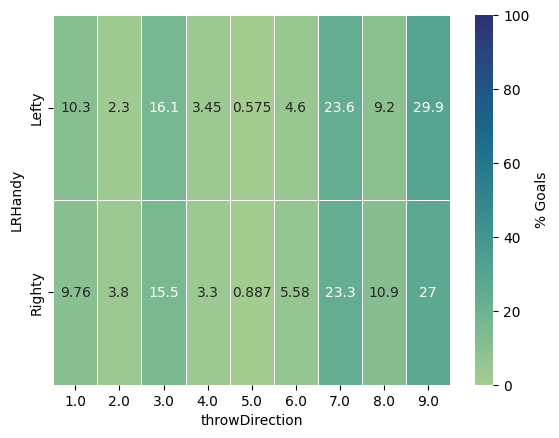

In [7]:
fig, ax = plt.subplots() 
sns.heatmap(pd.crosstab( df['LRHandy'], df['throwDirection'], normalize='index')*100, linewidth=0.5, ax=ax, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g',cbar_kws={'label': '% Goals'})
#sns.heatmap(pd.crosstab( df['name'], df['throwDirection'], normalize='index')*100, linewidth=0.5, ax=ax, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g',cbar_kws={'label': '% Goals'})

#ax.xaxis.tick_top()
plt.show()